In [116]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import sys

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from  sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import rfpimp
import pickle

In [7]:
df = pd.read_csv("../data/clean/clean_encoded.csv")

In [8]:
df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,231,0,11,93.994,364,4.857,51910,0,...,1,0,0,0,1,0,0,0,1,0


In [9]:
X = df.drop("y", axis=1)
y = df.y

No I try out some different classifiers and choose the one which fits best for this job.

In [123]:
rfc = RandomForestClassifier()
score = cross_validate(rfc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [124]:
score

{'fit_time': array([4.91549802, 5.05898404, 4.88689828, 5.35846615, 5.2695179 ,
        5.34985328, 5.29789996, 5.08963394, 3.12360597, 3.16834426]),
 'score_time': array([0.13152385, 0.22815585, 0.17901111, 0.16992497, 0.22004604,
        0.14845777, 0.17428398, 0.15786505, 0.12427497, 0.07718778]),
 'test_accuracy': array([0.88732394, 0.86716853, 0.14740165, 0.81447305, 0.69329772,
        0.36401166, 0.29924702, 0.07359728, 0.1867865 , 0.19504494]),
 'test_average_precision': array([0.17242728, 0.09221848, 0.08635732, 0.0727136 , 0.07722444,
        0.07178301, 0.06554969, 0.0631829 , 0.06174825, 0.09447818]),
 'test_recall': array([0.        , 0.        , 0.00215517, 0.01508621, 0.01293103,
        0.        , 0.00215983, 0.00431034, 0.00862069, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.00056931, 0.01799486, 0.00941176,
        0.        , 0.00069276, 0.00104767, 0.00238379, 0.21876473]),
 'test_roc_auc': array([0.53508378, 0.05710529, 0.0065593 , 0.09553182, 0.067

In [125]:
score["test_accuracy"].mean()

0.45283522767690043

In [70]:
bgc = BaggingClassifier()
score = cross_validate(bgc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [71]:
score

{'fit_time': array([2.09021115, 2.17717791, 2.04472923, 2.08550119, 2.27628589,
        2.35272026, 2.13977313, 2.23087502, 1.46954584, 1.47841883]),
 'score_time': array([0.04685783, 0.05258799, 0.05051994, 0.05451989, 0.04328609,
        0.02970481, 0.05576086, 0.03734708, 0.03455019, 0.03504109]),
 'test_accuracy': array([0.88732394, 0.6811559 , 0.06435163, 0.48980087, 0.48227295,
        0.08572122, 0.29778965, 0.07213991, 0.12387661, 0.16614039]),
 'test_average_precision': array([0.13753643, 0.10875682, 0.10287027, 0.09840345, 0.10168925,
        0.09580056, 0.10407798, 0.10175618, 0.07684802, 0.12249208]),
 'test_recall': array([0.        , 0.        , 0.00215517, 0.01939655, 0.02155172,
        0.00431034, 0.01079914, 0.00431034, 0.03663793, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.00051881, 0.00849457, 0.00929368,
        0.00106129, 0.00344709, 0.00104603, 0.00933809, 0.21279523]),
 'test_roc_auc': array([0.51400862, 0.15741488, 0.0123486 , 0.09366536, 0.099

In [72]:
score["test_accuracy"].mean()

0.33505730807583856

In [73]:
dtc = DecisionTreeClassifier()
score = cross_validate(dtc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [74]:
score

{'fit_time': array([0.38405919, 0.37010717, 0.35893297, 0.37868214, 0.40630341,
        0.42722416, 0.38691497, 0.38420391, 0.24306369, 0.2456398 ]),
 'score_time': array([0.02380395, 0.03675199, 0.02646828, 0.0225842 , 0.02157974,
        0.01643586, 0.01881123, 0.01297212, 0.01330709, 0.01283121]),
 'test_accuracy': array([0.88780962, 0.45264692, 0.06095192, 0.26566294, 0.32758621,
        0.08499271, 0.26135536, 0.06655332, 0.10687394, 0.15083799]),
 'test_average_precision': array([0.11650073, 0.11243442, 0.11195324, 0.10813534, 0.10879954,
        0.11008326, 0.11126692, 0.11126893, 0.10384421, 0.11717172]),
 'test_recall': array([0.00431034, 0.00215517, 0.00646552, 0.04094828, 0.03448276,
        0.0237069 , 0.01079914, 0.01293103, 0.08836207, 1.        ]),
 'test_f1': array([0.00858369, 0.00088652, 0.00154919, 0.01241019, 0.01142449,
        0.00580475, 0.00327761, 0.00311284, 0.02181431, 0.20976492]),
 'test_roc_auc': array([0.50215517, 0.25559407, 0.03716817, 0.16696954, 0.199

In [75]:
score["test_accuracy"].mean()

0.2665270913209695

In [191]:
lr = LogisticRegression()
score = cross_validate(lr, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [192]:
score

{'fit_time': array([0.61046004, 0.44901085, 0.93334389, 0.61266422, 0.91236091,
        0.42895198, 0.96005821, 0.81701565, 0.62533307, 0.57852602]),
 'score_time': array([0.02796197, 0.03328204, 0.01531816, 0.02433276, 0.01914811,
        0.03452587, 0.01435804, 0.02067113, 0.01223087, 0.01599526]),
 'test_accuracy': array([0.88732394, 0.88732394, 0.88732394, 0.89412336, 0.88732394,
        0.9057795 , 0.90599951, 0.91668691, 0.92980325, 0.41875152]),
 'test_average_precision': array([0.07308264, 0.05870681, 0.36702587, 1.        , 0.99680317,
        1.        , 0.98024921, 0.51141819, 0.84288799, 0.08567917]),
 'test_recall': array([0.        , 0.        , 0.        , 0.06034483, 0.        ,
        0.1637931 , 0.16414687, 0.375     , 0.4612069 , 0.38362069]),
 'test_f1': array([0.        , 0.        , 0.        , 0.11382114, 0.        ,
        0.28148148, 0.28200371, 0.50361795, 0.59693166, 0.12950164]),
 'test_roc_auc': array([0.25079182, 0.00147276, 0.64497398, 1.        , 0.998

In [193]:
score["test_accuracy"].mean()

0.8520439835161497

In [129]:
knc = KNeighborsClassifier()
score = cross_validate(knc, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [130]:
score

{'fit_time': array([0.99559021, 0.9396522 , 0.79633999, 0.81933188, 0.84669614,
        0.79331088, 0.95243788, 1.00703979, 0.86251283, 0.81090283]),
 'score_time': array([1.85488176, 1.83059597, 1.32313108, 1.82994795, 1.87481499,
        0.80514717, 1.11384416, 1.65466094, 0.99434018, 0.56305003]),
 'test_accuracy': array([0.88732394, 0.88659543, 0.80767363, 0.8596406 , 0.86449733,
        0.77853327, 0.78090843, 0.36361428, 0.71265485, 0.31430653]),
 'test_average_precision': array([0.12606241, 0.10865548, 0.10396372, 0.09873199, 0.09959279,
        0.09945183, 0.09402412, 0.08343308, 0.09726597, 0.14409938]),
 'test_recall': array([0.        , 0.        , 0.01077586, 0.00646552, 0.00862069,
        0.01724138, 0.06263499, 0.14655172, 0.13362069, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.01246883, 0.01027397, 0.01413428,
        0.01724138, 0.06041667, 0.04934688, 0.09487376, 0.24740069]),
 'test_roc_auc': array([0.5075431 , 0.38259678, 0.21257202, 0.34627646, 0.325

In [131]:
score["test_accuracy"].mean()

0.7255748296282263

KNeighborsClassifier and LogisticRegression seem to deliver the best results in terms of accuracy. So I try to optimize KNN a bit.

In [198]:
k_range = range(100, 5000, 100)
k_scores = []
for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    score = cross_val_score(knc, X, y, cv=10, scoring="accuracy", n_jobs=-1)
    k_scores.append(score.mean())
print(k_scores)

[0.7852969120915978, 0.7897176598576154, 0.8023725056190922, 0.8093193115457378, 0.8277550657356819, 0.8338274485386938, 0.8323700766659711, 0.8325158138532434, 0.8307912571371879, 0.8312284686990049, 0.8313742058862772, 0.8416486775889732, 0.8426202588374551, 0.8552751045989317, 0.8559066324104452, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8576797681889247, 0.8577040577201366, 0.8745852819125097, 0.8851269384585384, 0.8863899940815649, 0.8866814684561094, 0.8866814684561094, 0.8869972323618661, 0.888041682203984, 0.8879445240791359, 0.8873615753300468, 0.8873372857988346, 0.8873372857988346]


Text(0, 0.5, 'Cross-Validated Accuracy')

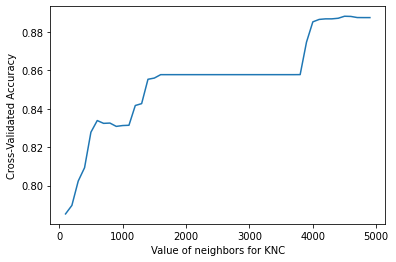

In [200]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of neighbors for KNC")
plt.ylabel("Cross-Validated Accuracy")

As seen in the plot. A KNC with 1500 neighbors would be a good choice. Higher numbers of neighbors won't lead to much improvement anymore and consume a lot of time.

## Now I train both classifiers with the right parameters.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

### LogisticRegression

In [249]:
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predict the values for the test datasest.**

In [250]:
y_pred = lr.predict(X_test)

In [251]:
accuracy_score(y_test, y_pred)

0.8981301602719767

**Have a look on the confusion matrix for the LogisticRegression model.**

Text(0.5, 1.0, 'Confusion matrix')

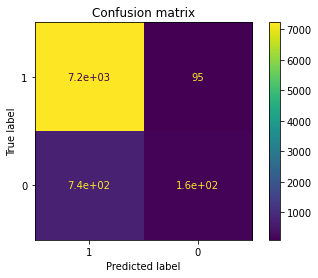

In [252]:
disp = plot_confusion_matrix(lr, X_test, y_test, display_labels=y_test)
disp.ax_.set_title("Confusion matrix")

**Have a look on the ROC curve of LR.**

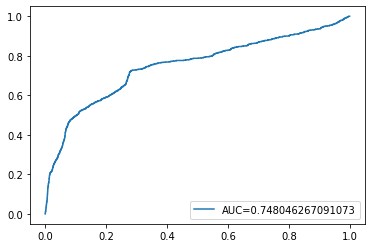

In [253]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### KNeighborsClassifier

In [254]:
knc = KNeighborsClassifier(n_neighbors=1500, n_jobs=-1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1500, p=2,
                     weights='uniform')

**Predict the values for the test datasest.**

In [255]:
y_pred = knc.predict(X_test)

In [256]:
accuracy_score(y_test, y_pred)

0.8975230694511899

**Have a look on the confusion matrix for the KNC model.**

Text(0.5, 1.0, 'Confusion matrix')

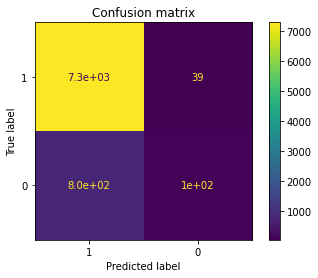

In [257]:
disp = plot_confusion_matrix(knc, X_test, y_test, display_labels=y_test)
disp.ax_.set_title("Confusion matrix")

**Have a look on the ROC curve of LR.**

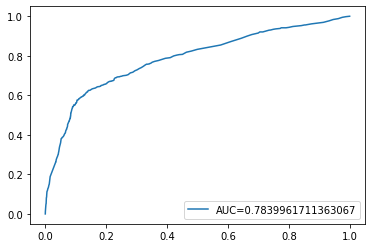

In [258]:
y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Which Classifier I choose.

I choose the LogisticRegression Classifier because it detects less False Positives and is a bit faster. Overall the models both do a good job in detecting true positives. They only detect a few False Negatives. False Positives are only the customers which are not so likley to open a deposit but are still in the marketing effort. This will lead to increased marketing cost but it would be worse if the model can not recognize people which will open a depsoit.

Plot feature importance.

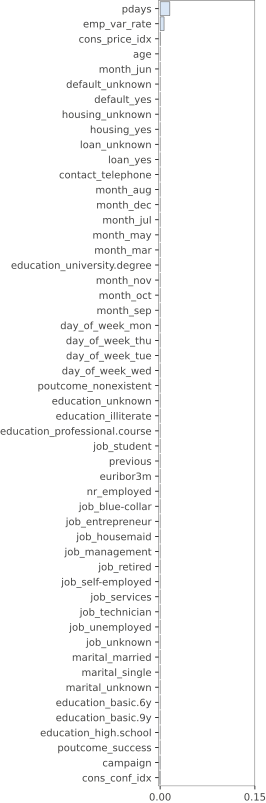

In [260]:
importance = rfpimp.importances(lr, X_train, y_train)
rfpimp.plot_importances(importance)

And finally I save the model for later use.

In [262]:
pickle.dump(knc, open("../models/KNeighborsClassifier.model", "wb"))
pickle.dump(lr, open("../models/LogisticRegression.model", "wb"))

Instruction on how to use a saved model.

In [11]:
loaded_rfc = pickle.load(open('../models/RandomForestClassifier.model', 'rb'))

In [ ]:
sample = ["..."]

In [ ]:
loaded_rfc.predict([sample])